<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/Copy_of_Relocating_reg_plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## ---- Diastolic (Not Systolic) Blood Pressure Data ---
## ---- Normal: Less than 80 mmHg
## ---- Elevated: 80–89 mmHg
## ---- Stage 1 Hypertension: 80–89 mmHg
## ---- Stage 2 Hypertension: 90 mmHg or higher

                            Model      MSE  R² Score
0               Linear Regression  23.9175    0.8520
1       Rotated Linear Regression   0.0000    1.0000
2        Fourier Basis Regression  22.0768    0.8634
3  Polynomial Regression (deg 15)  24.5205    0.8482
4           KNN Regression (k=10)  22.7941    0.8589


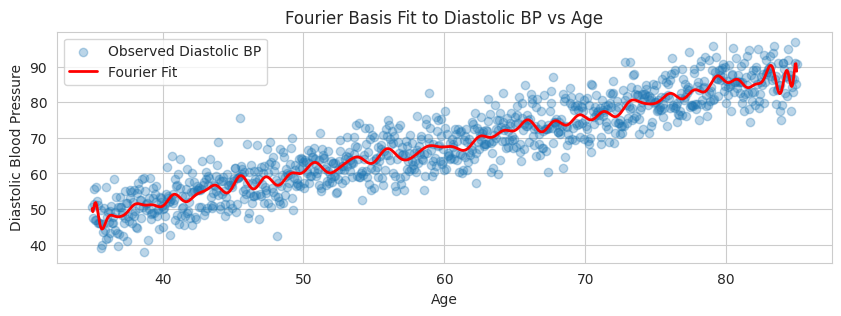

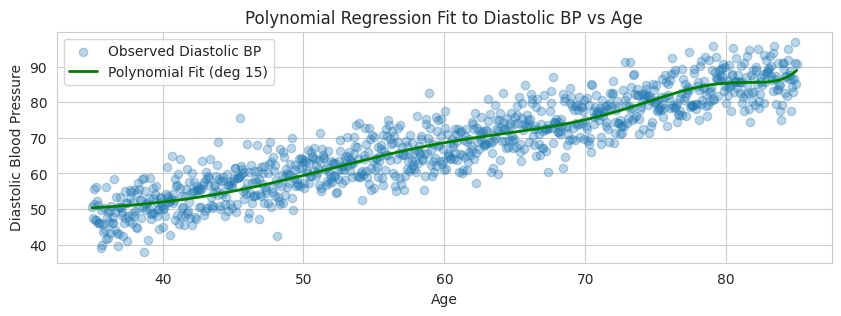

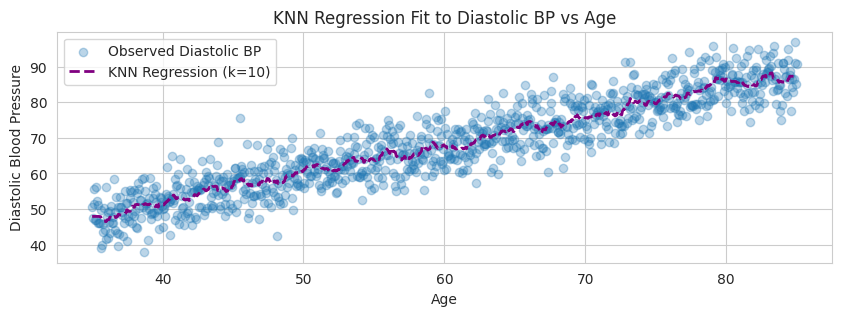

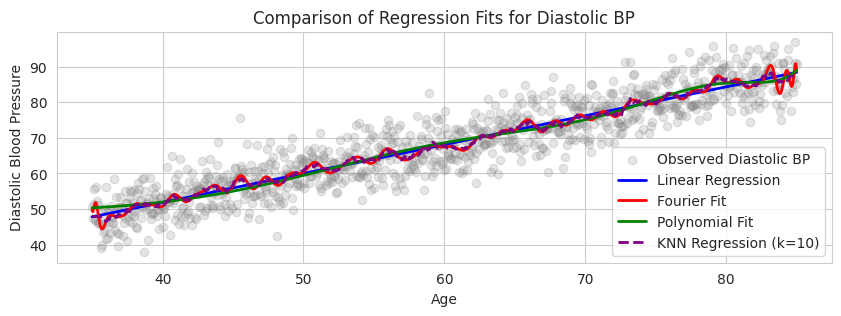

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# --- Simulated Diastolic (Not Systolic) Blood Pressure Data ---
np.random.seed(42)
age = np.linspace(35, 85, 1000)
diastolic_bp = 0.8 * age + 20 + np.random.normal(0, 5, size=age.shape)

# --- Reshape for Regression ---
age_reshaped = age.reshape(-1, 1)

# --- Original Linear Regression ---
model = LinearRegression()
model.fit(age_reshaped, diastolic_bp)
predictions = model.predict(age_reshaped)

# --- Rotated Linear Regression via Procrustes ---
Q_age = age_reshaped / np.linalg.norm(age)
Q_bp = diastolic_bp.reshape(-1, 1) / np.linalg.norm(diastolic_bp)
M = Q_bp @ Q_age.T
U, _, Vt = np.linalg.svd(M)
Rotation = U @ Vt
Rotated_age = Rotation @ Q_age

model_rotated = LinearRegression()
model_rotated.fit(Rotated_age, diastolic_bp)
Rotated_predictions = model_rotated.predict(Rotated_age)

# --- Multi-Period Fourier Basis with Trend ---
def multi_period_fourier_basis(t, max_n=500, periods=[1000, 2000, 3000, 4000, 5000]):
    basis = [np.ones_like(t)]  # Intercept
    basis.append(t)            # Linear trend
    for period in periods:
        for n in range(1, max_n + 1):
            basis.append(np.cos(2 * np.pi * n * t / period))
            basis.append(np.sin(2 * np.pi * n * t / period))
    return np.column_stack(basis)

# --- Fourier Basis Regression ---
X_fourier = multi_period_fourier_basis(age, max_n=500, periods=[1000, 2000, 3000, 4000, 5000])
model_fourier = LinearRegression()
model_fourier.fit(X_fourier, diastolic_bp)
predicted_fourier = model_fourier.predict(X_fourier)

# --- Polynomial Regression ---
poly_degree = 15
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_poly = poly.fit_transform(age_reshaped)

model_poly = LinearRegression()
model_poly.fit(X_poly, diastolic_bp)
predicted_poly = model_poly.predict(X_poly)

# --- K-Nearest Neighbors Regression ---
knn_model = KNeighborsRegressor(n_neighbors=22)
knn_model.fit(age_reshaped, diastolic_bp)
predicted_knn = knn_model.predict(age_reshaped)

# --- Compute All Metrics ---
mse_original = mean_squared_error(diastolic_bp, predictions)
r2_original = r2_score(diastolic_bp, predictions)

mse_rotated = mean_squared_error(diastolic_bp, Rotated_predictions)
r2_rotated = r2_score(diastolic_bp, Rotated_predictions)

mse_fourier = mean_squared_error(diastolic_bp, predicted_fourier)
r2_fourier = r2_score(diastolic_bp, predicted_fourier)

mse_poly = mean_squared_error(diastolic_bp, predicted_poly)
r2_poly = r2_score(diastolic_bp, predicted_poly)

mse_knn = mean_squared_error(diastolic_bp, predicted_knn)
r2_knn = r2_score(diastolic_bp, predicted_knn)

import pandas as pd

# --- Collect all regression results in a dictionary ---
metrics_data = {
    "Model": [
        "Linear Regression",
        "Rotated Linear Regression",
        "Fourier Basis Regression",
        f"Polynomial Regression (deg {poly_degree})",
        "KNN Regression (k=10)"
    ],
    "MSE": [
        mse_original,
        mse_rotated,
        mse_fourier,
        mse_poly,
        mse_knn
    ],
    "R² Score": [
        r2_original,
        r2_rotated,
        r2_fourier,
        r2_poly,
        r2_knn
    ]
}

# --- Create DataFrame and round values ---
metrics_df = pd.DataFrame(metrics_data).round(4)

# --- Display the table ---
print(metrics_df)


# --- Individual Fourier Fit Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, alpha=0.3, label='Observed Diastolic BP')
plt.plot(age, predicted_fourier, color='red', linewidth=2, label='Fourier Fit')
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Fourier Basis Fit to Diastolic BP vs Age')
plt.legend()
plt.grid(True)
plt.show()

# --- Individual Polynomial Fit Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, alpha=0.3, label='Observed Diastolic BP')
plt.plot(age, predicted_poly, color='green', linewidth=2, label='Polynomial Fit (deg {})'.format(poly_degree))
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Polynomial Regression Fit to Diastolic BP vs Age')
plt.legend()
plt.grid(True)
plt.show()

# --- Individual KNN Regression Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, alpha=0.3, label='Observed Diastolic BP')
plt.plot(age, predicted_knn, color='purple', linewidth=2, linestyle='--', label='KNN Regression (k=10)')
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure')
plt.title('KNN Regression Fit to Diastolic BP vs Age')
plt.legend()
plt.grid(True)
plt.show()


# --- All Fits Comparison Plot ---
plt.figure(figsize=(10, 3))
plt.scatter(age, diastolic_bp, label="Observed Diastolic BP", color='gray', alpha=0.2)
plt.plot(age, predictions, label="Linear Regression", color='blue', linewidth=2)
plt.plot(age, predicted_fourier, label="Fourier Fit", color='red', linewidth=2)
plt.plot(age, predicted_poly, label="Polynomial Fit", color='green', linewidth=2)
plt.plot(age, predicted_knn, label="KNN Regression (k=10)", color='purple', linestyle='--', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Diastolic Blood Pressure")
plt.title("Comparison of Regression Fits for Diastolic BP")
plt.grid(True)
plt.legend()
plt.show()


In [67]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load and sort dataset by increasing target value
data = load_diabetes()
X = data.data
y = data.target


# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Convert X to DataFrame with feature names
X_df = pd.DataFrame(X, columns=data.feature_names)

# Preview the standardized features
print(X_df.info())
X_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


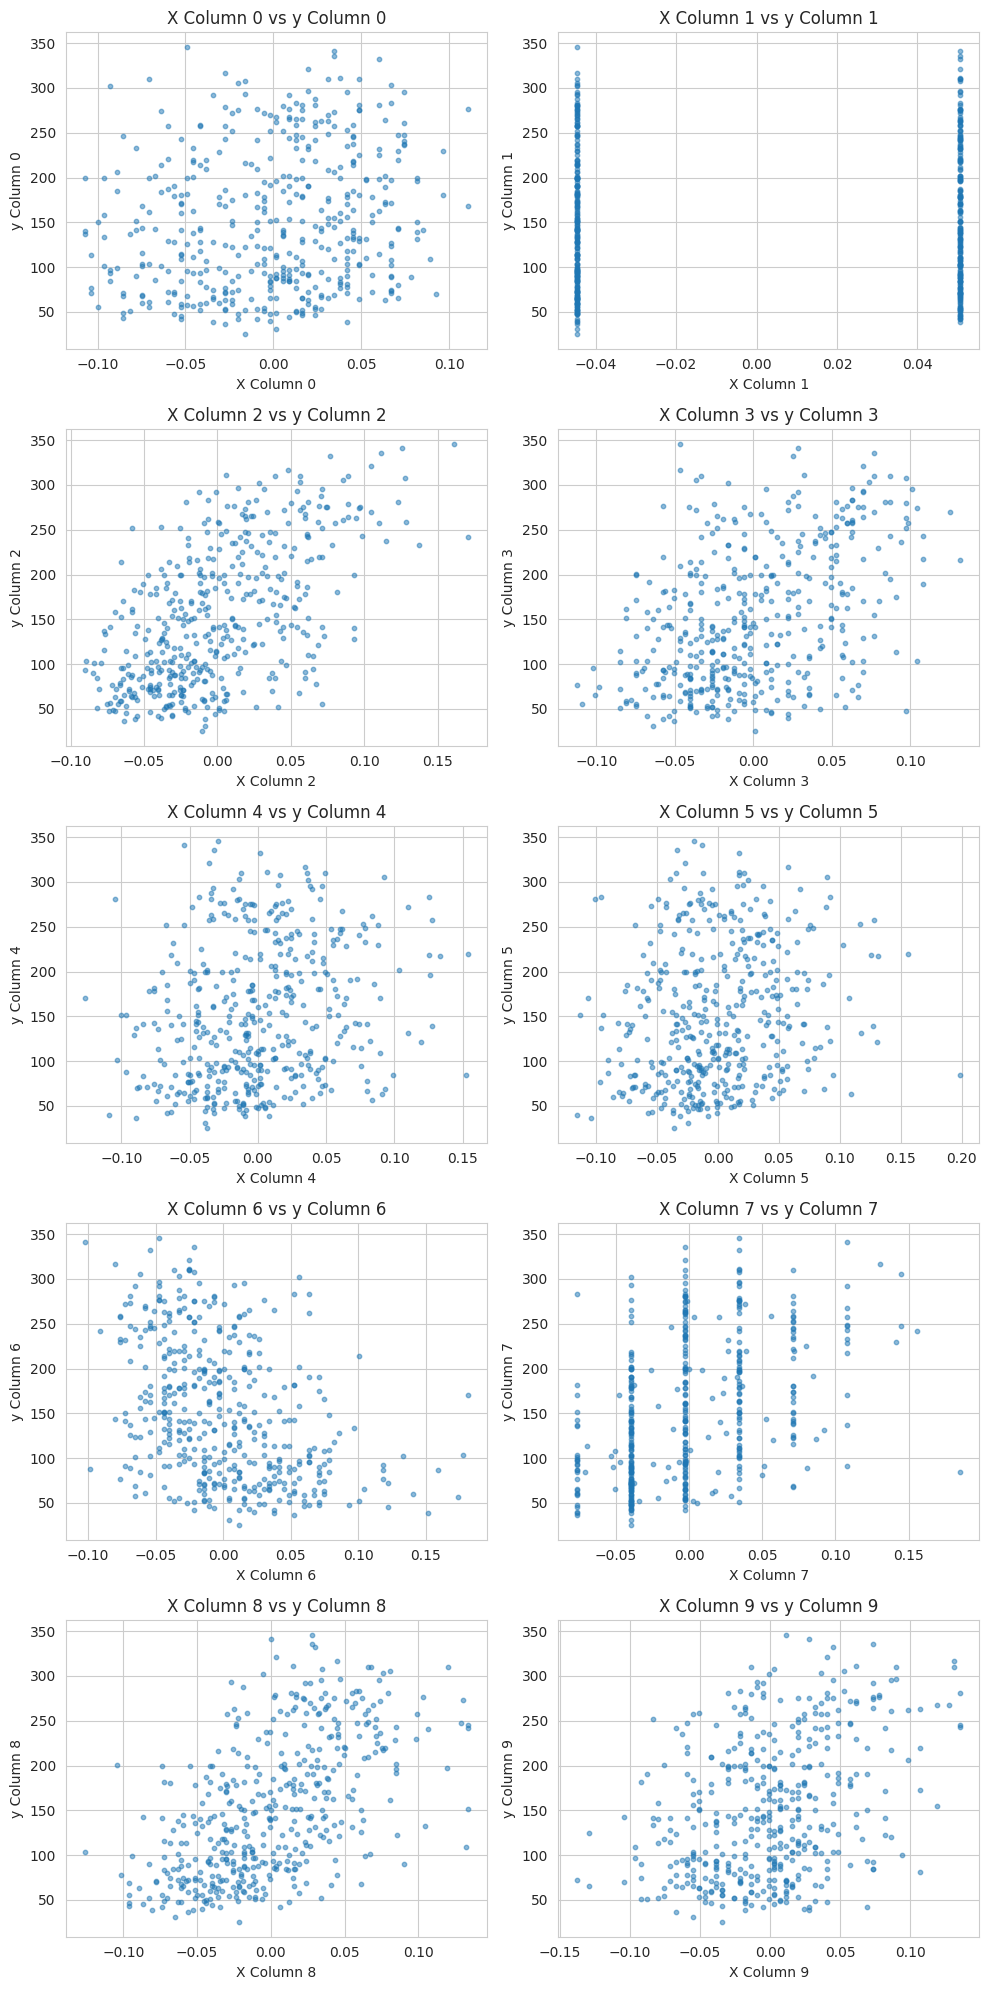

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the dataset
data = load_diabetes()
X = data.data  # Features matrix
y = data.target  # Target vector

# Step 1: Sort each column of X independently
indices = np.argsort(X, axis=0)

# Step 2: Create an empty matrix for y_updated_matrix with the same shape as X
y_updated_matrix = np.zeros_like(X)

# Step 3: For each column of X, rearrange y according to the sorted indices of that column
for i in range(X.shape[1]):
    y_updated_matrix[:, i] = y[indices[:, i]]

# Plotting each column of X against corresponding y
plt.figure(figsize=(10, 20))

# Plot for each feature (column) of X against y_updated_matrix
for i in range(X.shape[1]):
    plt.subplot(5, 2, i+1)  # Creating subplots to avoid overlap
    plt.scatter(X[indices[:, i], i], y_updated_matrix[:, i], alpha=0.5 , s=10)
    plt.xlabel(f"X Column {i}")
    plt.ylabel(f"y Column {i}")
    plt.title(f"X Column {i} vs y Column {i}")
    plt.grid(True)

plt.tight_layout()
plt.show()


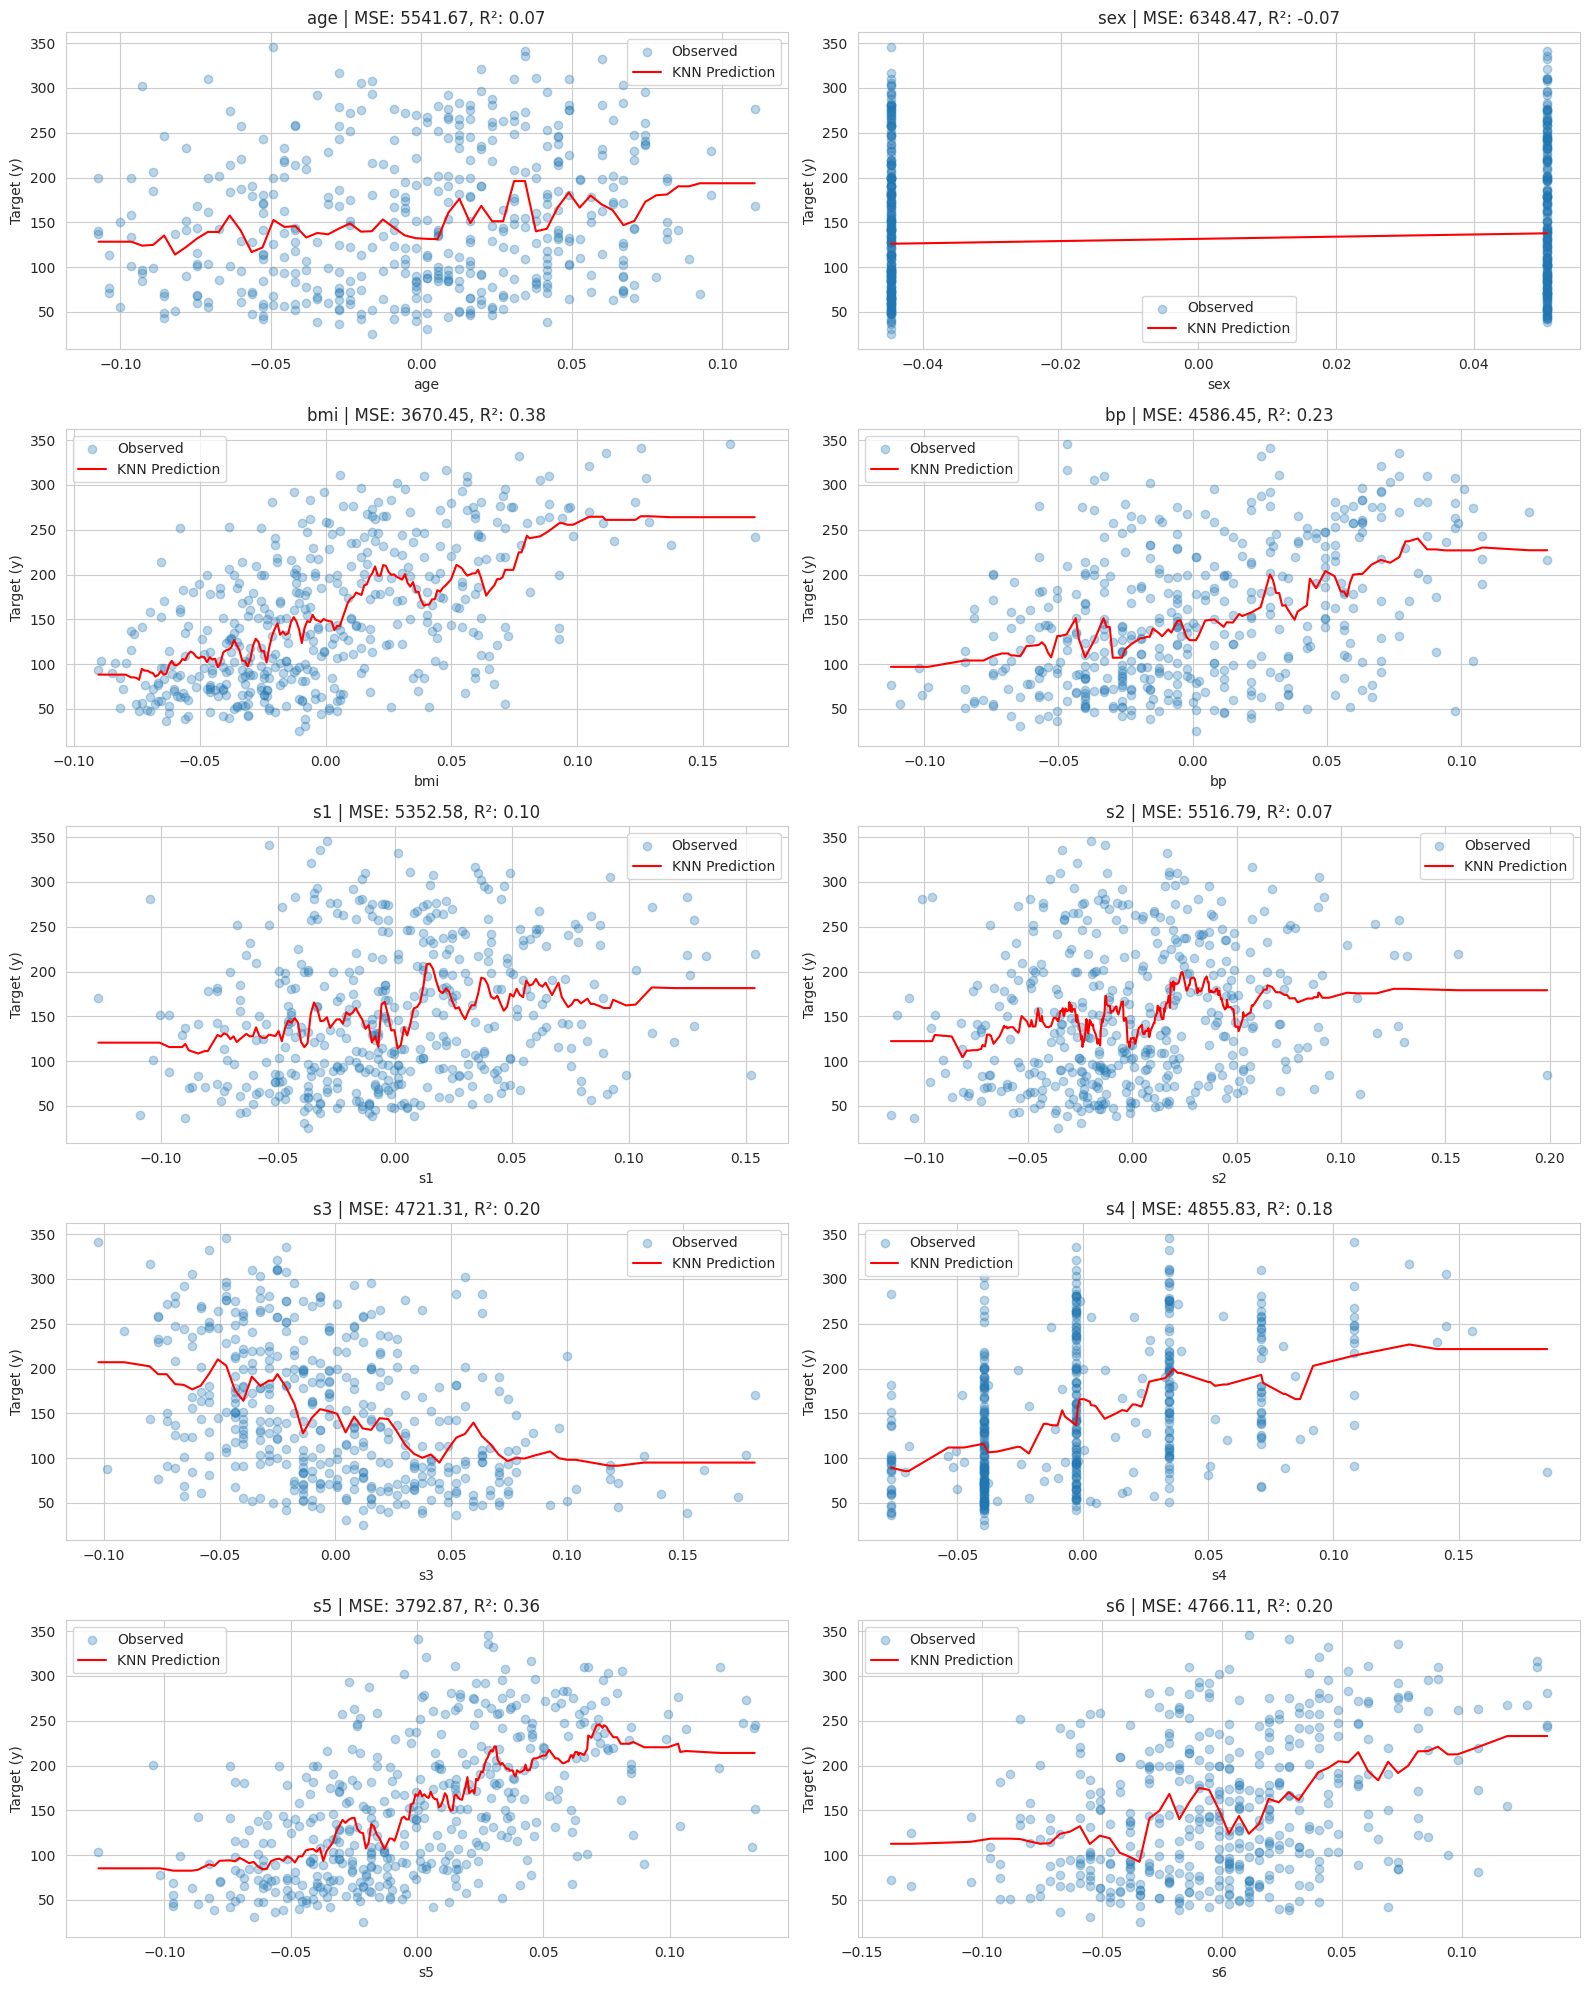


KNN Regression Summary (each feature, k=21):
  Feature        MSE      R2
0     age  5541.6735  0.0655
1     sex  6348.4747 -0.0706
2     bmi  3670.4523  0.3810
3      bp  4586.4535  0.2266
4      s1  5352.5771  0.0974
5      s2  5516.7946  0.0697
6      s3  4721.3111  0.2038
7      s4  4855.8283  0.1811
8      s5  3792.8711  0.3604
9      s6  4766.1149  0.1963

KNN Regression on full feature set (k=21):
  MSE: 2929.7406
  R² Score: 0.5059


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 1: Sort each column of X independently
X_sorted = np.sort(X, axis=0)

# Step 2: Align y for each sorted column
y_updated = np.zeros_like(X_sorted)
for i in range(X.shape[1]):
    sorted_indices = np.argsort(X[:, i])
    y_updated[:, i] = y[sorted_indices]

# Step 3: KNN Regression for each column
k = 21
mse_list = []
r2_list = []

plt.figure(figsize=(16, 20))
for i in range(X.shape[1]):
    xi = X_sorted[:, i].reshape(-1, 1)
    yi = y_updated[:, i]

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(xi, yi)
    y_pred = knn.predict(xi)

    mse = mean_squared_error(yi, y_pred)
    r2 = r2_score(yi, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)

    # Plot
    plt.subplot(5, 2, i + 1)
    plt.scatter(xi, yi, alpha=0.3, label='Observed')
    plt.plot(xi, y_pred, color='red', label='KNN Prediction')
    plt.title(f"{feature_names[i]} | MSE: {mse:.2f}, R²: {r2:.2f}")
    plt.xlabel(feature_names[i])
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Step 4: KNN Regression on full X vs y
knn_full = KNeighborsRegressor(n_neighbors=k)
knn_full.fit(X, y)
y_pred_full = knn_full.predict(X)

mse_full = mean_squared_error(y, y_pred_full)
r2_full = r2_score(y, y_pred_full)

# Step 5: Summary table
results_df = pd.DataFrame({
    'Feature': feature_names,
    'MSE': np.round(mse_list, 4),
    'R2': np.round(r2_list, 4)
})

print("\nKNN Regression Summary (each feature, k={}):".format(k))
print(results_df)

print("\nKNN Regression on full feature set (k={}):".format(k))
print(f"  MSE: {mse_full:.4f}")
print(f"  R² Score: {r2_full:.4f}")


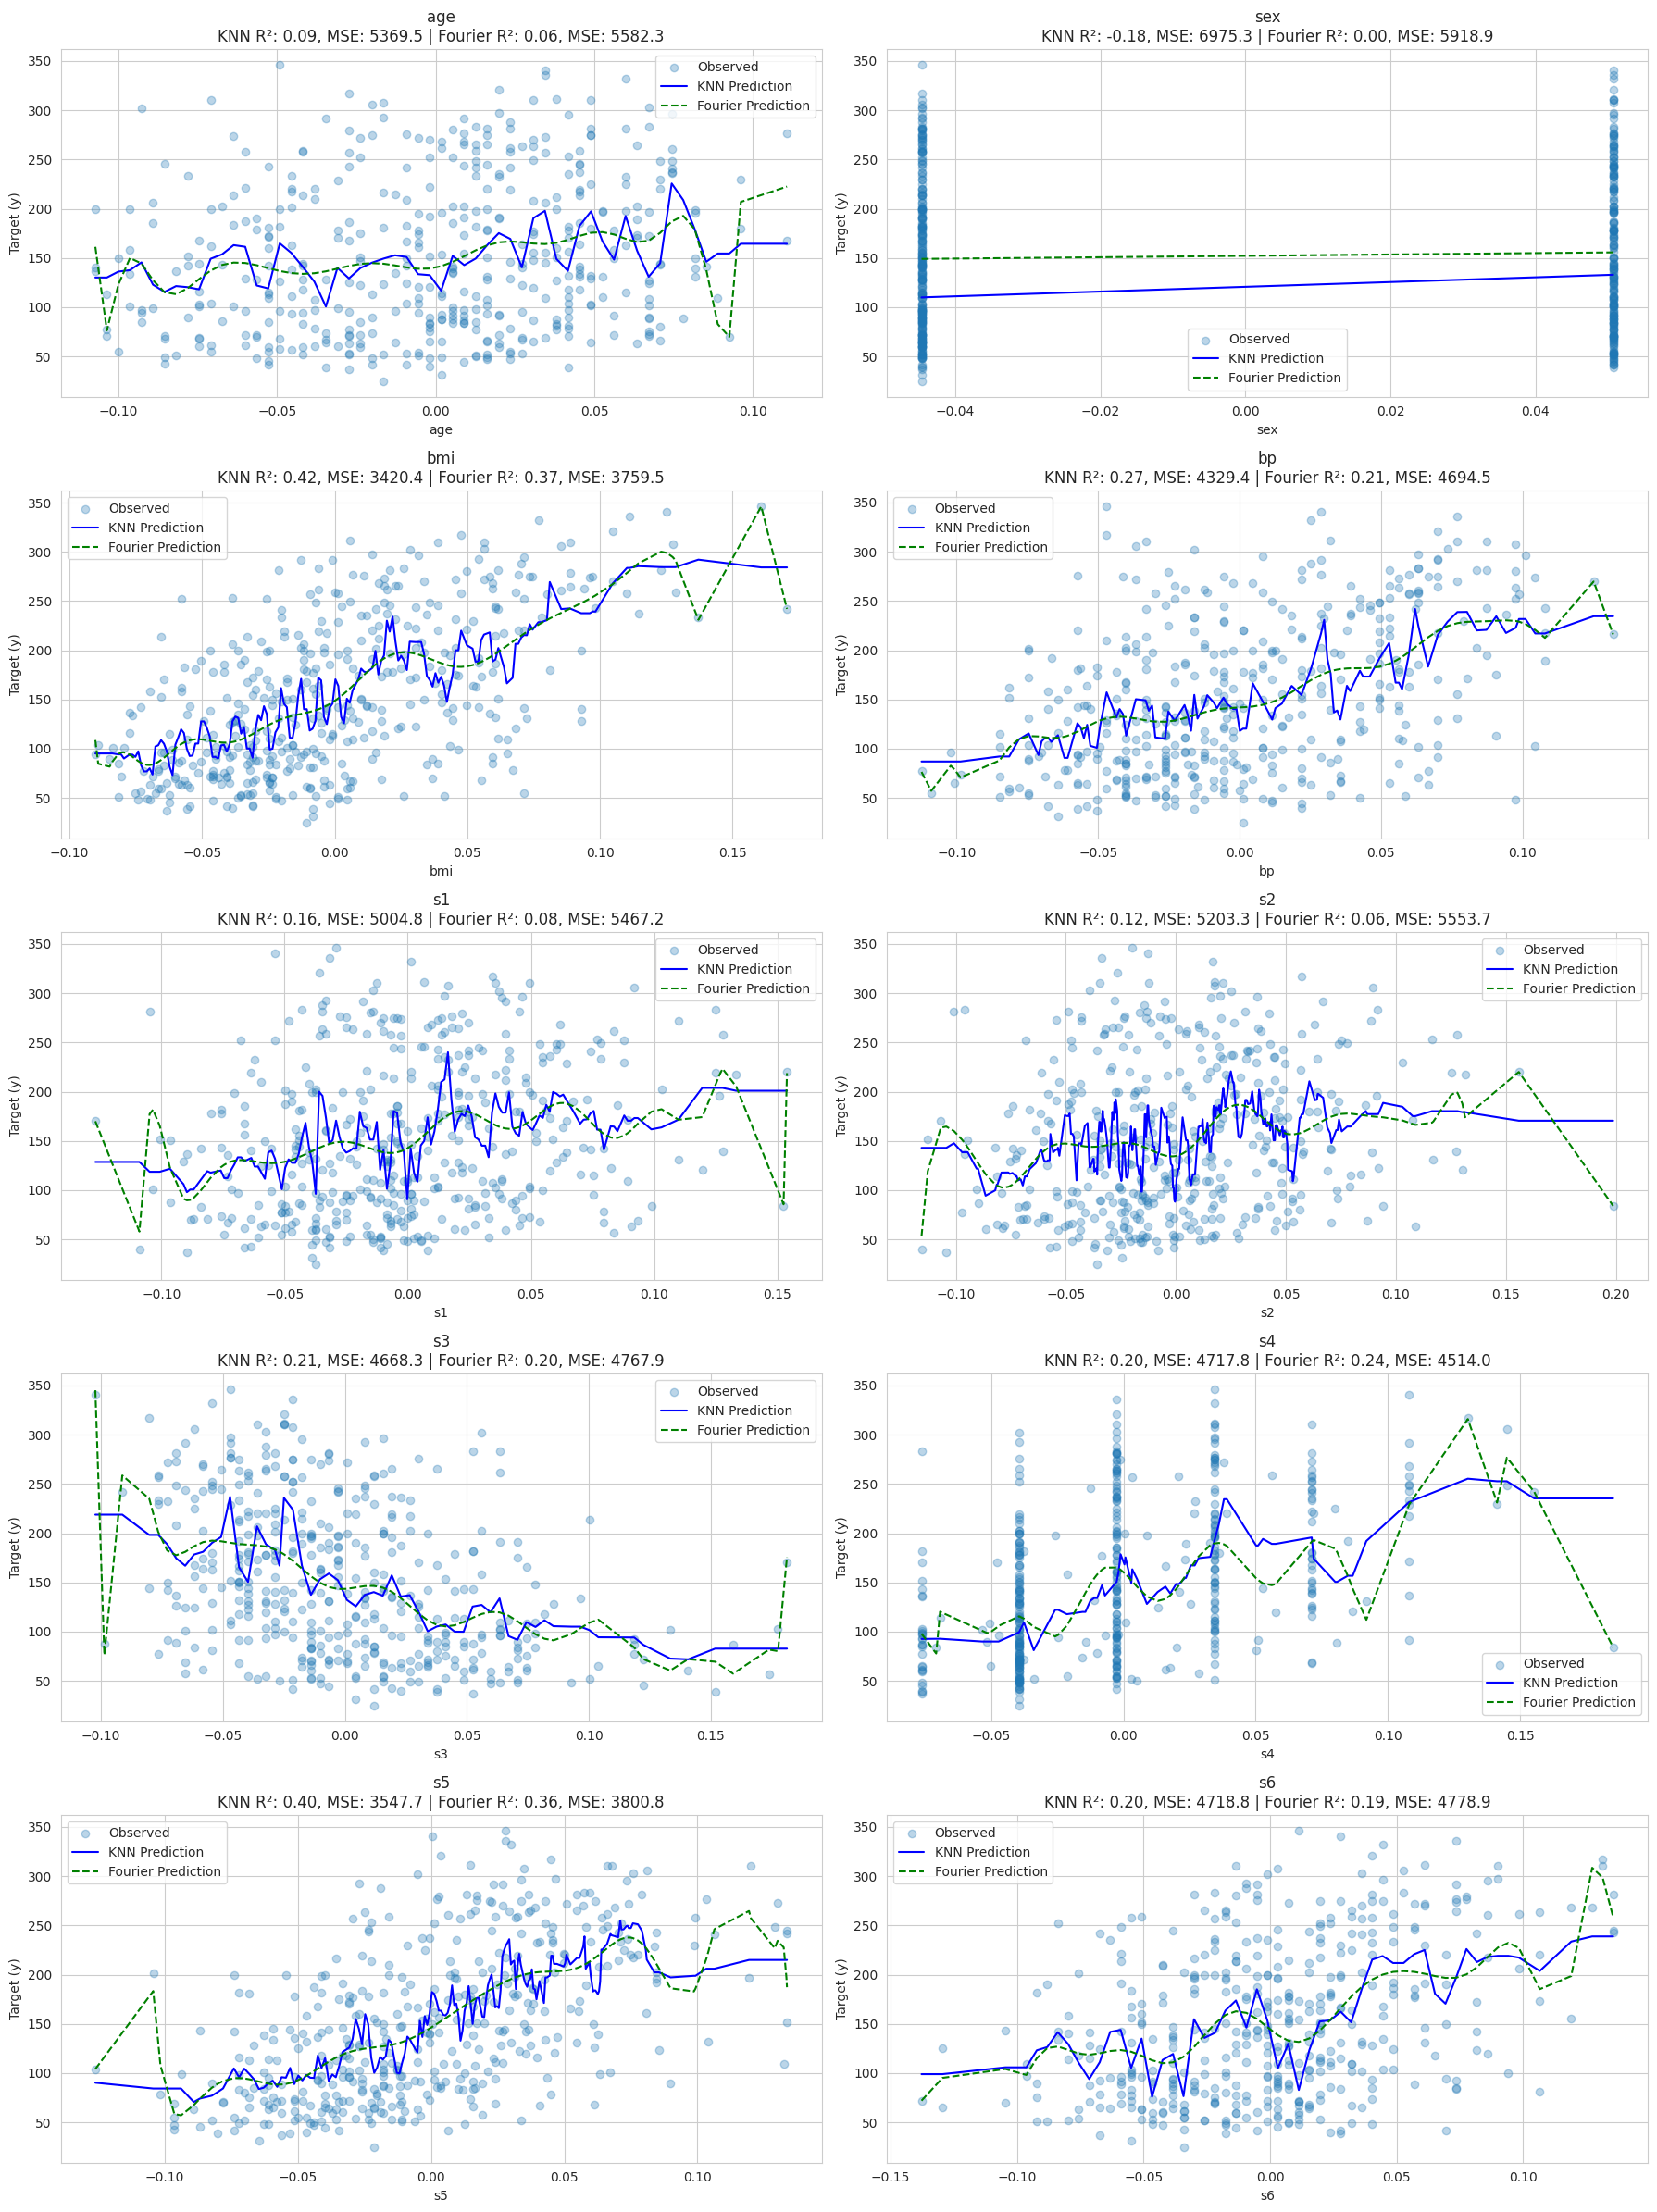


Comparison of KNN vs Fourier Basis Regression (Per Feature):
  Feature    KNN_MSE  KNN_R2  Fourier_MSE  Fourier_R2
0     age  5369.5400  0.0945    5582.2943      0.0586
1     sex  6975.3457 -0.1763    5918.8889      0.0019
2     bmi  3420.4242  0.4232    3759.4772      0.3660
3      bp  4329.3593  0.2699    4694.4797      0.2083
4      s1  5004.7533  0.1560    5467.1935      0.0780
5      s2  5203.2649  0.1225    5553.6863      0.0634
6      s3  4668.2931  0.2128    4767.8848      0.1960
7      s4  4717.8170  0.2044    4513.9871      0.2388
8      s5  3547.6957  0.4017    3800.8287      0.3590
9      s6  4718.7659  0.2042    4778.9101      0.1941


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names
n_samples = X.shape[0]

# Step 1: Sort each column of X independently
X_sorted = np.sort(X, axis=0)

# Step 2: Align y for each sorted column
y_updated = np.zeros_like(X_sorted)
for i in range(X.shape[1]):
    sorted_indices = np.argsort(X[:, i])
    y_updated[:, i] = y[sorted_indices]

# Fourier Basis Function
def fourier_basis(x, max_n, periods):
    basis = [np.ones_like(x)]  # Intercept
    for period in periods:
        for n in range(1, max_n + 1):
            basis.append(np.cos(2 * np.pi * n * x / period))
            basis.append(np.sin(2 * np.pi * n * x / period))
    return np.column_stack(basis)

# Prepare to store metrics
k = 10
mse_knn_list, r2_knn_list = [], []
mse_fourier_list, r2_fourier_list = [], []

plt.figure(figsize=(18, 24))
for i in range(X.shape[1]):
    xi = X_sorted[:, i].reshape(-1, 1)
    yi = y_updated[:, i]

    # --- KNN Regression ---
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(xi, yi)
    y_pred_knn = knn.predict(xi)
    mse_knn = mean_squared_error(yi, y_pred_knn)
    r2_knn = r2_score(yi, y_pred_knn)
    mse_knn_list.append(mse_knn)
    r2_knn_list.append(r2_knn)

    # --- Fourier Regression ---
    max_n = n_samples*10
    periods = [n_samples * m for m in range(1, 6)]  # [n, 2n, ..., 5n]
    X_fourier = fourier_basis(xi.flatten(), max_n=max_n, periods=periods)
    model_fourier = LinearRegression()
    model_fourier.fit(X_fourier, yi)
    y_pred_fourier = model_fourier.predict(X_fourier)
    mse_fourier = mean_squared_error(yi, y_pred_fourier)
    r2_fourier = r2_score(yi, y_pred_fourier)
    mse_fourier_list.append(mse_fourier)
    r2_fourier_list.append(r2_fourier)

    # --- Plot Both Predictions ---
    plt.subplot(5, 2, i + 1)
    plt.scatter(xi, yi, alpha=0.3, label='Observed')
    plt.plot(xi, y_pred_knn, color='blue', label='KNN Prediction')
    plt.plot(xi, y_pred_fourier, color='green', linestyle='--', label='Fourier Prediction')
    plt.title(f"{feature_names[i]}\nKNN R²: {r2_knn:.2f}, MSE: {mse_knn:.1f} | Fourier R²: {r2_fourier:.2f}, MSE: {mse_fourier:.1f}")
    plt.xlabel(feature_names[i])
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# --- Summary Table ---
summary_df = pd.DataFrame({
    'Feature': feature_names,
    'KNN_MSE': np.round(mse_knn_list, 4),
    'KNN_R2': np.round(r2_knn_list, 4),
    'Fourier_MSE': np.round(mse_fourier_list, 4),
    'Fourier_R2': np.round(r2_fourier_list, 4)
})

print("\nComparison of KNN vs Fourier Basis Regression (Per Feature):")
print(summary_df)
